In [49]:
############################
#
#       DERIVATIVES
#
############################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

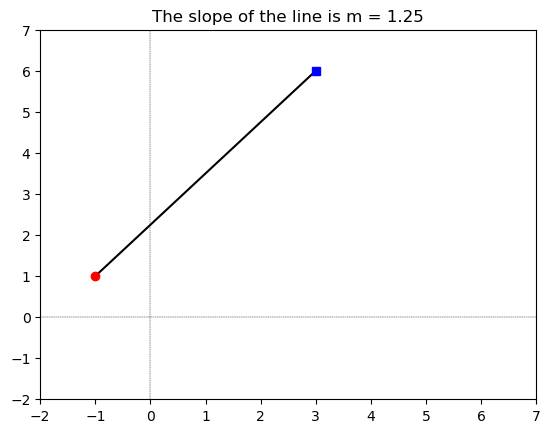

In [50]:
##### LOCAL vs. GLOBAL SLOPES ####

# The concept of a derivative is chopping up a line into smaller and smaller segments (the Limit as x coords distance goes to 0)


#### The Global Slope of a line ####

# Two xy coords for two points on a line
p1 = [ -1,1 ]
p2 = [ 3,6 ]

# Compute the slope for this line - distance between y coords over x coords of the points
m = (p2[1] - p1[1]) / (p2[0] - p1[0]) # delta y / delta x

# Note: draw/plot the line FIRST before placing the points so the points are on top of the line (and the line doesn't show as overlapping the points if drawn after)
plt.plot([p1[0],p2[0]],[p1[1],p2[1]], 'k') # draw line connecting the points
plt.plot(p1[0],p1[1],'ro',label='point 1')
plt.plot(p2[0],p2[1],'bs',label='point 2')

plt.title(f'The slope of the line is m = {m}')
plt.plot([0,0],[-2,7],'k--',linewidth=.3) # vertical line along x=0
plt.plot([-2,7],[0,0],'k--',linewidth=.3) # horizontal line along y=0
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.show()

Global Slope: 4.0
Avg of Local Slopes: 4.0


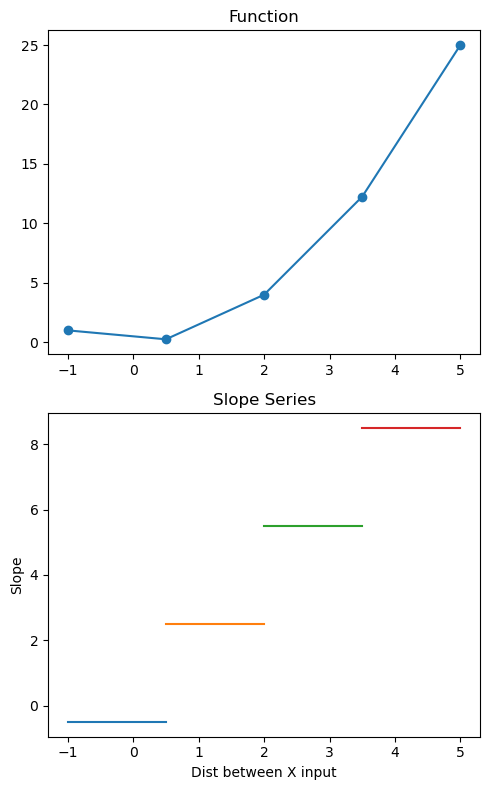

In [53]:
def plot_slopes(num_segments=5):
    x = np.linspace(-1,5,num_segments)
    y = x**2 # function to make a curved line out of segments

    _,axs = plt.subplots(2,1,figsize=(5,8)) # 2 rows, 1 col layout
    # plot the curved line
    axs[0].plot(x,y,'o-')
    axs[0].set_title('Function')

    ######################
    #    SLOPE SERIES
    ######################

    # initialize the slope variable to 0s
    m = np.zeros(num_segments-1) # line segments is one less than num points

    # plot the Slope Series - loop over the line segments
    for i in range(0,num_segments-1): # (segments is one less than number of points)
        m[i] = y[i+1] - y[i] # y coord distance for each line segment
        # to get the slope normalize the y distance by the x distance
        m[i] /= x[i+1] - x[i] # x distance for line segment

        xcoords = [ x[i],x[i+1] ] # horizontal line coords showing x points distance
        ycoords = [ m[i], m[i] ] # the y distance for the line segment (poisitions line vertically on it)
        axs[1].plot(xcoords,ycoords) # line showing the slope in the slope series


    globalSlope = (y[-1] - y[0]) / (x[-1] - x[0]) # first and last points
    avgLocalSlopes = np.mean(m) # compare with avg of all the local slopes
    print(f'Global Slope: {globalSlope}')
    print(f'Avg of Local Slopes: {avgLocalSlopes}')

    axs[1].set_title('Slope Series')
    axs[1].set_xlabel('Dist between X input')
    axs[1].set_ylabel('Slope')


    plt.tight_layout() # helps layout so title on bottom doesn't overlap with top plot
    plt.show()
    # the slope series plot visualizes the x coord distances at each segment against the slope of that segment


N = 5 # number of line segments - if this is set to infinity, the resulting slope series becomes the derivative

plot_slopes(N)


Global Slope: 24.0
Avg of Local Slopes: 4.0


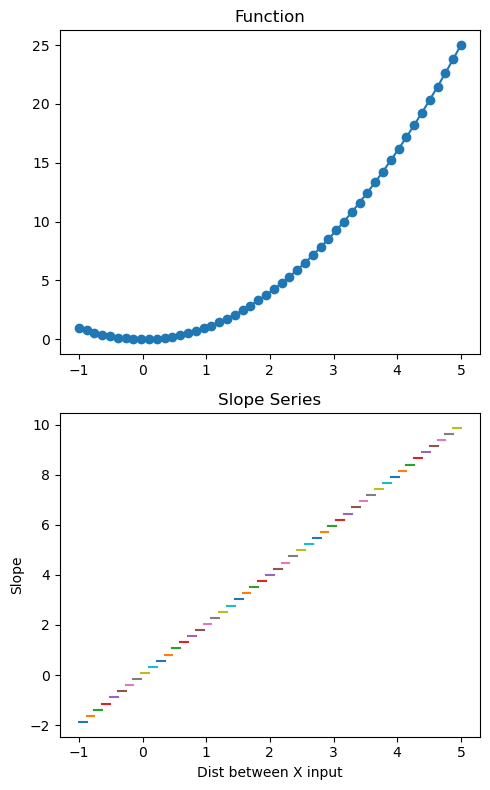

In [52]:
#### MORE LINE SEGMENTS (getting higher resolution slope series and closer to becoming the derivative)

N = 50

plot_slopes(N)

## Note how the global slope average (between first and last point) is the same as the local slopes average

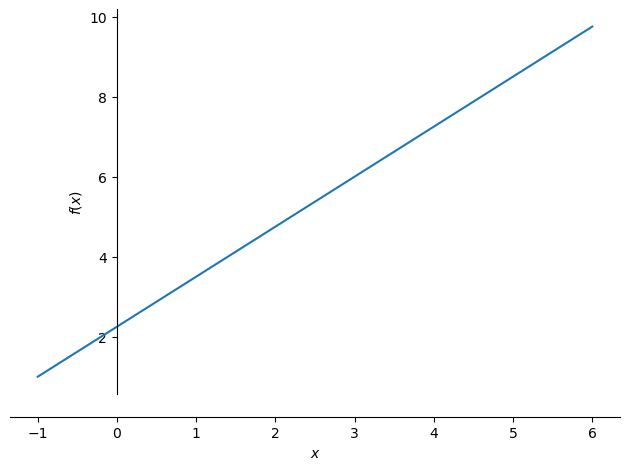

1.25000000000000

In [5]:
###################################
# Differentiation with Sympy
###################################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

x = sym.symbols('x')
fx = (5/4)*x + 9/4

sym.plot(fx,(x,-1,6), axis_center=[0,0]) # restrict x range to -1 to 6

# Compute the derivative with sympy using diff()
dydx = sym.diff(fx,x) # enter the function and which variable to compute diffentiation for
display(dydx)

2*x

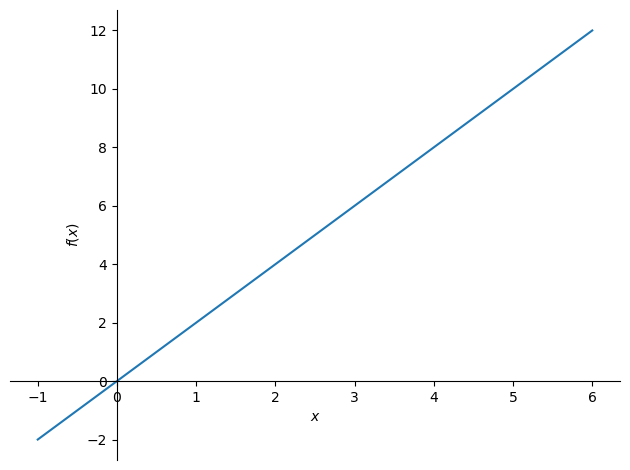

f'(-1) = -2
f'(0) = 0
f'(2) = 4


In [9]:
# Plotting the derivative

fx = x**2
fPrime = sym.diff(fx,x)
display(fPrime)

sym.plot(fPrime,(x,-1,6))
# the derivative 2x is a straight line with a slope of 2
# for each input x on the x-axis we can see what the derivative of the function is when x is that value on the y-axis

# ***The plot of the derivative shows us that for x^2, the slope gets more and more steep as x gets further away from zero


# Find derivatives at different x values:
somePoints = [-1,0,2]

for p in somePoints:
    dpdy = fPrime.subs(x,p) # substitute out the x values for a specific point (reruns the diff() with it)
    print(f"f'({p}) = {dpdy}")

# At f(-1), for example, there is a slope of -2 which means that the function does down 2 infinitesimals when it goes over 1 infinitesimal on the x-axis
  # see https://www.udemy.com/course/pycalc1_x/learn/lecture/33947394 at 13:00

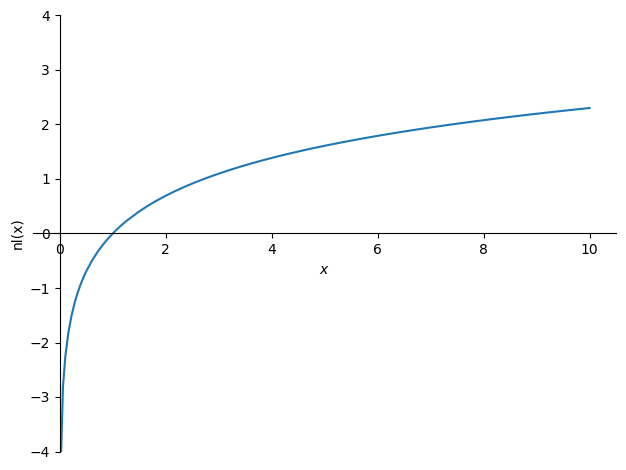

1/x

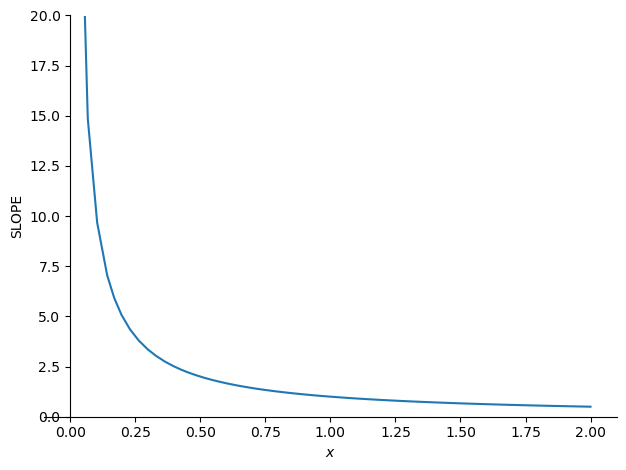

In [ ]:
##########################################
#     INTERPRETING DERIVATIVES PLOTS
##########################################

import sympy as sym

x = sym.symbols('x')

# fx = 4 * (5*x)
# sym.diff(fx,x)

# sym.plot(fx, (x,-10,10),ylim=[-20,100])

fx = sym.log(x)

p = sym.plot(fx,(x,-4,10),ylim=[-4,4],ylabel="nl(x)",show=False)
p.show()

fPrime = sym.diff(fx, x)
display(fPrime)
p = sym.plot(fPrime,(x,0,2), ylabel="SLOPE", ylim=[0,20], axis_center=(0,0), show=False)
p.show()

In [67]:
##################################################
#
#    THE LINEARITY PROPERTY OF DIFFERENTIATION
#
##################################################

import sympy as sym
from IPython.display import display, Math # for showing latex coding

x,a,b,c = sym.symbols('x,a,b,c')

# x is the independent variable and a,b,c are constants
fun = a*x**2 + b*x**2 + c*sym.exp(2*x) # The whole function: ax^2 + bx^2 + ce^2x
print('The function f(x):')
display(fun)

# Derivative of the entire function - tell sympy which is the independent variable by passing it in
dxdy = sym.diff(fun,x) # x is the independent variable, a,b,c are constants
display(Math('\\text{Derivative of f(x) is }%s' %sym.latex(dxdy)))

# We can now start to differentiate the additive terms separately

# get individual components of the sympy expression
components = fun.args # sympy expressions are objects with this property on them to get the additive components
display(components)

print('\nDERIVATIVES OF THE SEPARATE TERMS:')

combined = 0
# we can loop through the components as they are an iterable tuple
for piece in fun.args:
    dy = sym.diff(piece,x)
    display(Math('\\text{The derivative of } %s \\text{ is } %s' %(sym.latex(piece),sym.latex(dy))))
    # add all the piece derivatives together to show the result is the same as the derivative for the entire function
    combined += dy

print('The Combined Derivatives (should be the same as entire function derivative computed previously):')
display(combined)

assert combined == dxdy # the combined derivates computed separately of the terms equals the derivative computed for the entire function


The function f(x):


a*x**2 + b*x**2 + c*exp(2*x)

<IPython.core.display.Math object>

(a*x**2, b*x**2, c*exp(2*x))


DERIVATIVES OF THE SEPARATE TERMS:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The Combined Derivatives (should be the same as entire function derivative computed previously):


2*a*x + 2*b*x + 2*c*exp(2*x)

In [71]:
##################################################################
#   LINEARITY OF SCALAR MULTIPLICATIVE ASPECT IN DIFFERENTIATION
##################################################################

fx = a*x**2

dydx = sym.diff(fx,x)
print('Derivative of ax^2:')
display(dydx)

# caculate deravitive of term x^2 separately from the multiplier scalar a
ddx = sym.diff(x**2,x)
display(a*ddx)

assert a*ddx == dydx # results of having the constant a inside the differentiation computation of the entire function and outside of it multiplying the term derivative are the same

Derivative of ax^2:


2*a*x

2*a*x

In [78]:
###############################################################################
#   FULL LINEARITY (ADDITIVE AND MULTIPLICATIVE ASPECTS) OF DIFFERENTATION
###############################################################################

fx = a*x**2 + b*sym.cos(x)
display(fx)
ddx = sym.diff(fx,x)
display(Math('\\text{The Derivative: } \\frac{d}{dx}(ax^2 + b\\cos(x)) = %s' %sym.latex(ddx)))

# show that differentiating the additive terms separately, pulling out the constants and scaling them with those and summing up, equals the same as differentiating the entire function
first_diff = a*sym.diff(x**2,x)
second_diff = b*sym.diff(sym.cos(x),x)

# a times the differentiation of first term plus b times the differentiation of the second term
display(Math('a\\frac{d}{dx}(x^2) + b\\frac{d}{dx}\\cos(x) = %s' %sym.latex(first_diff + second_diff)))

assert first_diff+second_diff == ddx

a*x**2 + b*cos(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

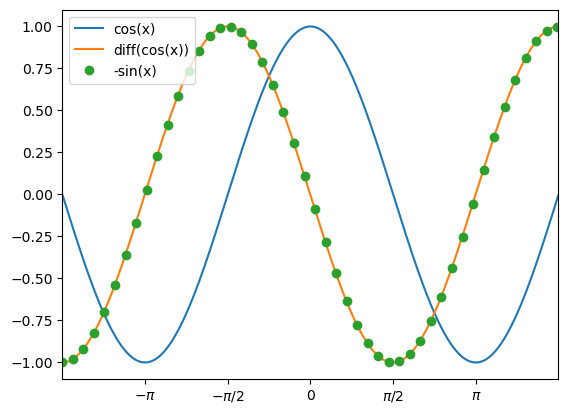

In [17]:
######################################
#     TRIG FUNCTION DERIVATIVES      #
# (Getting derivatives using Numpy)  #
######################################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# parameter for the steps of x range
dx = .01
# create a domain of inputs from -1.5pi to 1.5pi
x = np.arange(-1.5*np.pi, 1.5*np.pi, step=dx)

# cosine
fx = np.cos(x)
# The empirical derivative of cosine - use .diff in numpy to get the Difference vector (or discrete derivative)
dfx = np.diff(fx) / dx # rise / run or dy/dx - take diffs of how output rises and scale by the amount of change in successive x inputs (dx parameter)
# .diff computes the difference between two successive numbers
# np.diff([1,2,3,5,8]) -> [1,1,2,3] - diff of successive nums in the list

########## THIS IS THE EMPIRICAL DERIVATIVE #################
# np.diff/dx is the Empirical estimate of the true Derivative and the smaller you make dx (i.e. towards 0, .000001 etc.), or in the limit as dx approaches 0, the closer the output is the analytical true derivative

plt.plot(x,fx,label='cos(x)')
#  We need to exclude the very last element to make the .diff output the same size and length as x inputs 
#   (taking the difference of successive nums adds one element more at the end which causes an error)
plt.plot(x[:-1],dfx,label='diff(cos(x))') # show the difference between successive cosine values from the output (related to the dx step parameter set above)
# the green dots is the true derivative of cos(x) and should overlap completely the empirical derivative we estimated
plt.plot(x[::20],-np.sin(x[::20]),'o', label='-sin(x)') # evaluate every 20th point to get dots with spaces along the plot

plt.legend()
plt.xlim(x[[0,-1]]) # limit x axis to first and last element in x inputs
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],labels=['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$']) # define the ticks on x-axis and show as radian values with pi symbol
plt.show()

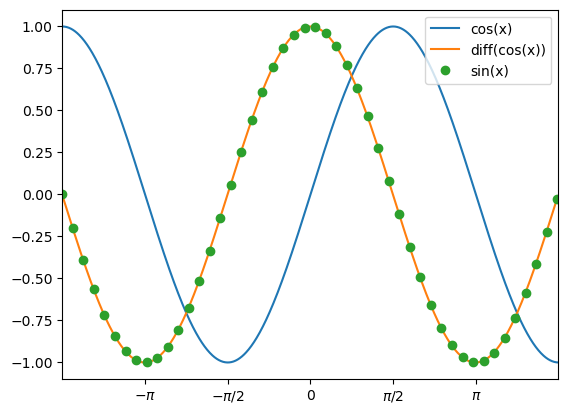

In [ ]:
########### Derivative of Sin #############

# Same approach as above with cosine
dx = .01
x = np.arange(-1.5*np.pi, 1.5*np.pi, step=dx)

fx = np.sin(x)
dfx = np.diff(fx) / dx # rise / run or dy/dx - take diffs of how output rises and scale by the amount of change in successive x inputs (dx parameter)

########## THIS IS THE EMPIRICAL DERIVATIVE #################

plt.plot(x,fx,label='cos(x)')
plt.plot(x[:-1],dfx,label='diff(sin(x))') # show the difference between successive cosine values from the output (related to the dx step parameter set above)
plt.plot(x[::20],np.cos(x[::20]),'o', label='sin(x)') # true derivative of sin is just cosine (no flipping of the sign to negative like with cosine derivative to -sin)

plt.legend()
plt.xlim(x[[0,-1]]) 
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],labels=['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$']) # define the ticks on x-axis and show as radian values with pi symbol
plt.show()

# Remember that to interpret a derivative plot, if y is negative that means the slope of the output is going down to some degree, if it is 0 the slope is flat, and if y is positive the slope on the function is going up to that degree

In [ ]:
############ THE CYCLE OF DERIVATIVES FOR COS AND SIN ############

import sympy as sym

x = sym.symbols('x')

f = sym.cos(x)
print('Cycle of Differentiation for Cos/Sin:\n')

for i in range(4):
    print(f"({f})' = {sym.diff(f)}")
    # set current f to be the derivative computed to continue through the cycle of cos-sin differentiations
    f = sym.diff(f)


Cycle of Differentiation for Cos/Sin

(cos(x))' = -sin(x)
(-sin(x))' = -cos(x)
(-cos(x))' = sin(x)
(sin(x))' = cos(x)


In [28]:
# Are inverse trig functions also cyclic like sin and cos?

x = sym.symbols('x')

f = sym.acos(x) # arccos is the inverse of cosine, or cos^-1(x). Start with that and see what the cycle shows
print('Cycle of Differentiation for Inverse Trig Functions:\n')

for i in range(4):
    print(f"({f})' = {sym.diff(f)}")
    f = sym.diff(f)

Cycle of Differentiation for Inverse Trig Functions:

(acos(x))' = -1/sqrt(1 - x**2)
(-1/sqrt(1 - x**2))' = -x/(1 - x**2)**(3/2)
(-x/(1 - x**2)**(3/2))' = -3*x**2/(1 - x**2)**(5/2) - 1/(1 - x**2)**(3/2)
(-3*x**2/(1 - x**2)**(5/2) - 1/(1 - x**2)**(3/2))' = -15*x**3/(1 - x**2)**(7/2) - 9*x/(1 - x**2)**(5/2)
